In [17]:
import random
random.seed(42)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

sns.set()

df = pd.read_csv("dadoscartola.csv",) 
df.columns = ['nome', 'clube','posicao','preco','variacao','ult_ponto',
              'media','jogo','roubada_bola','gol','assistencia','jogo_sem_sofrer_gol',
              'finalizacao_fora','finalizacao_fora','finalizacao_defendida','finalizacao_trave',
              'defesa_dificil','defesa_penalti','gol_contra','cartao_vermelho','cartao_amarelo',
              'penalti_perdido','gol_sofrido','falta_cometida','impedimento','passe_errado']
    
print("Número de linhas e colunas no conjunto de treinamento:", df.shape)
attributes = list(df.columns)
df.head(10)


Número de linhas e colunas no conjunto de treinamento: (236, 26)


,nome,clube,posicao,preco,variacao,ult_ponto,media,jogo,roubada_bola,gol,...,defesa_dificil,defesa_penalti,gol_contra,cartao_vermelho,cartao_amarelo,penalti_perdido,gol_sofrido,falta_cometida,impedimento,passe_errado
0,Abel Braga,Fluminense,T�cnico,11.57,-0.40,0.93,3.23,20,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aderllan Santos,S�o Paulo,Zagueiro,6.00,0.00,0.00,0.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Adilson,Atl�tico-MG,Meia,4.06,0.15,0.90,0.30,12,14,0,...,0,0,0,0,4,0,0,23,1,22
3,Alan Santos,Coritiba,Meia,6.30,0.89,9.80,2.42,14,26,0,...,0,0,0,0,2,0,0,18,1,34
4,Alejandro Guerra,Palmeiras,Meia,13.82,0.66,4.50,5.43,14,17,5,...,0,0,0,0,3,0,0,22,2,53
5,Alex Silva,Atl�tico-MG,Lateral,4.91,0.00,0.00,3.58,9,14,0,...,0,0,0,0,3,0,0,21,0,25
6,Alison,Santos,Meia,5.28,0.64,4.80,3.08,13,22,1,...,0,0,0,0,1,0,0,13,0,16
7,Anderson Martins,Vasco,Zagueiro,9.41,0.97,4.50,2.05,2,2,0,...,0,0,0,0,1,0,0,3,0,5
8,Andr�,Sport,Atacante,10.74,0.00,0.00,5.19,19,17,9,...,0,0,0,0,3,0,0,42,14,48
9,Andr�s R�os,Vasco,Atacante,4.55,2.20,9.80,3.25,2,2,0,...,0,0,0,0,1,0,0,3,0,2


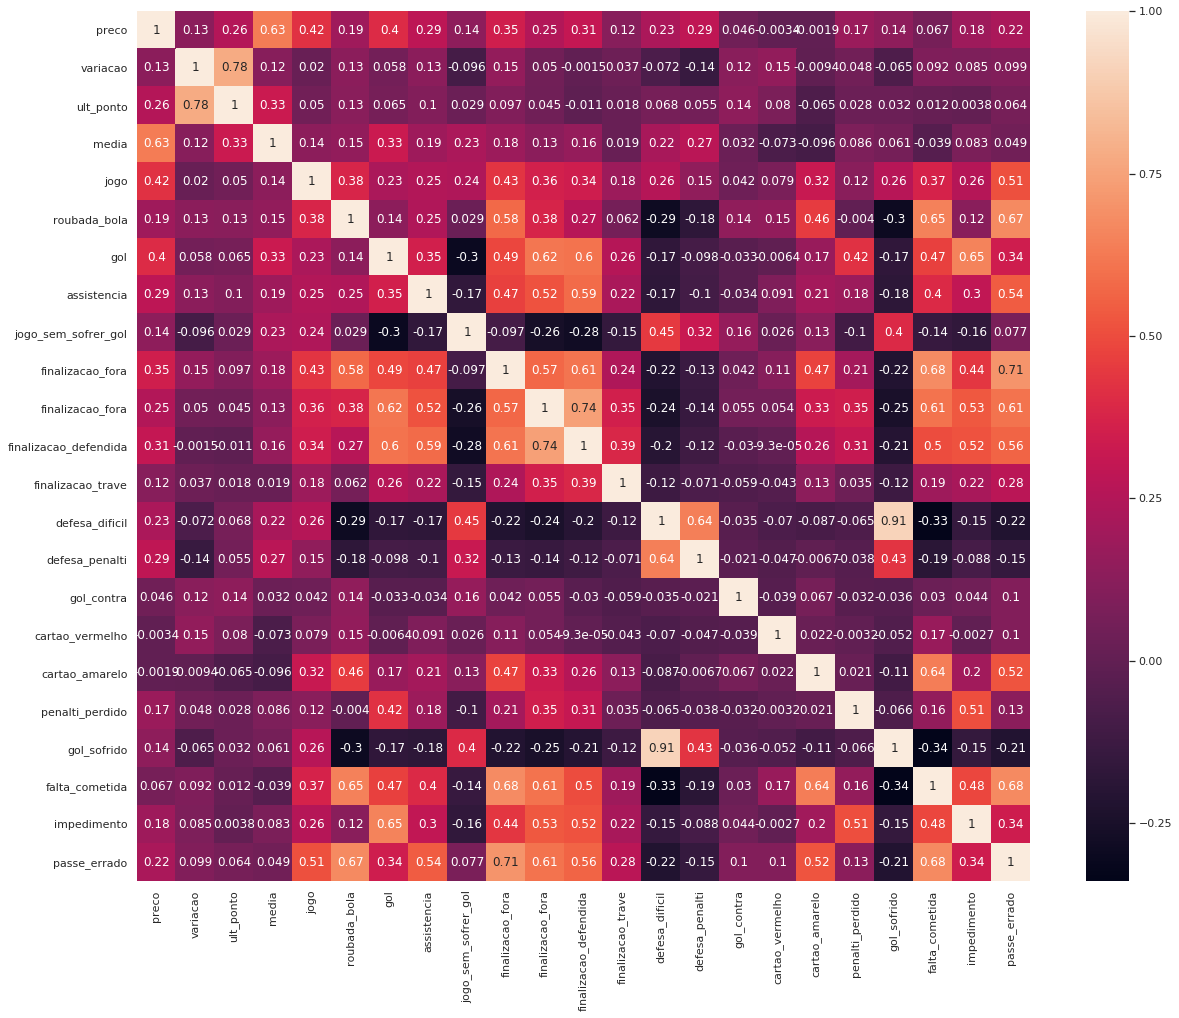

In [14]:
corr= df.corr()
#PlotCorrelationMatrix usingMatplotlib
plt.figure(figsize=(20, 16))
sns.heatmap(corr,annot=True) # matriz de correlação

In [23]:
x = np.column_stack((df['preco'],df['variacao']))  #Agrupa as variaveis preditorass
x = sm.add_constant(x, prepend=True) #Adiciona a coluna das constantes
res = sm.OLS(y,x).fit() #Cria e ajusta o modelo

print(res.params)
print(res.bse)
print(res.summary())

const    1.101060
x1       0.270591
x2       0.069541
dtype: float64
const    0.205373
x1       0.022150
x2       0.092252
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  media   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     77.45
Date:                Sat, 24 Oct 2020   Prob (F-statistic):           1.63e-26
Time:                        02:29:45   Log-Likelihood:                -414.53
No. Observations:                 236   AIC:                             835.1
Df Residuals:                     233   BIC:                             845.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      